In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import*
from sklearn.datasets import*
from sklearn.cluster import KMeans

In [2]:
veri=pd.read_excel("https://www.dropbox.com/s/49u0cutfy0i8drh/T-shirt.xlsx?dl=1")
veri.head()

,Unnamed: 0,Boy,Kilo,Beden
0,0,149,51,S
1,1,151,50,S
2,2,145,57,S
3,3,148,54,S
4,4,149,55,S


In [3]:
x=veri[['Boy','Kilo']]

In [4]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=1000,random_state=0)
veri['urun_tahmin']=kmeans.fit_predict(x)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Boy', ylabel='Kilo'>

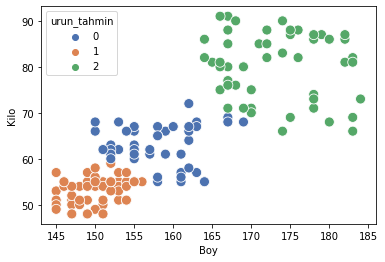

In [5]:
centers=kmeans.cluster_centers_
sns.scatterplot(veri['Boy'],veri['Kilo'],hue=veri['urun_tahmin'],s=100,palette='deep')

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
veri['Beden']=le.fit_transform(veri['Beden'])

In [7]:
True_Matching=round(np.mean((veri['urun_tahmin']==veri['Beden'])*100))
print("True Matching: %.2f"%True_Matching)

True Matching: 10.00


In [8]:
from sklearn.metrics import*

In [9]:
print("\nADJUSTED RAND SKOR: %.2f"%adjusted_rand_score(veri['Beden'],veri['urun_tahmin']))
print()
print("\nMUTULA INFORMATION SKOR: %.2f"%mutual_info_score(veri['Beden'],veri['urun_tahmin']))
print()
print("\nHOMOGENEITY SKOR: %.2f"%homogeneity_score(veri['Beden'],veri['urun_tahmin']))
print()
print("\nCOMPLETENESS SKOR: %.2f"%completeness_score(veri['Beden'],veri['urun_tahmin']))
print()


ADJUSTED RAND SKOR: 0.75


MUTULA INFORMATION SKOR: 0.82


HOMOGENEITY SKOR: 0.75


COMPLETENESS SKOR: 0.75



In [10]:
kmeans_kwargs={'init':'k-means++','n_init':10,'max_iter':1000,'random_state':0}
silhouette_skor=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(x)
    skor=silhouette_score(x,kmeans.labels_)
    silhouette_skor.append(skor)

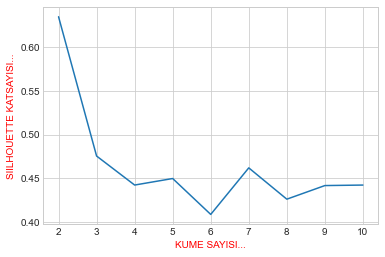

In [11]:
plt.style.use("seaborn-whitegrid")
plt.plot(range(2,11),silhouette_skor)
plt.xticks(range(2,11))
plt.xlabel("KUME SAYISI...",c='r')
plt.ylabel("SIILHOUETTE KATSAYISI...",c='r')
plt.show()

In [15]:
sse=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
print(sse)

[11040.255657708629, 7554.34641943734, 5264.897862636663, 4263.647650186072, 3570.1820202020194, 2791.2795750189257, 2250.605835667601, 1870.1859442349767, 1631.3760822510822]


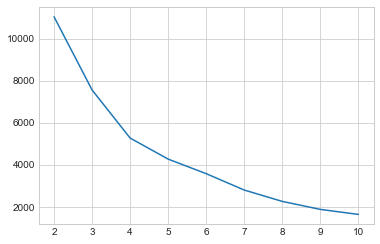

In [16]:
plt.style.use("seaborn-whitegrid")
plt.plot(range(2,11),sse)
plt.show()

## 